# V2

In [247]:
import requests
import json
import time
api_key = "VPs3Ad9wEPYqJSAqYa2SmYArw0MG9L1B"


In [374]:
def fetch_articles(page, api_key='VPs3Ad9wEPYqJSAqYa2SmYArw0MG9L1B'):
    url = 'https://api.nytimes.com/svc/search/v2/articlesearch.json'
    params = {
        'fq': 'section_name:("A") AND print_page:1',
        'api-key': api_key,
        'page': page
    }
    response = requests.get(url, params=params)
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Failed to fetch articles from page {page}. Status code: {response.status_code}")
        return None



# Initialize list to store article data
articles_list = []

for page in range(10):  # Adjust range as needed
    data = fetch_articles(page)
    if data is not None and 'response' in data and 'docs' in data['response']:
        for article in data['response']['docs']:
            article_info = {
                'headline': article['headline']['main'],
                'pub_date': article['pub_date'],
                'web_url': article['web_url']
            }
            articles_list.append(article_info)
            print(article['headline']['main'])  # Print the headline of each article
    else:
        print(f"No articles found on page {page}")

    # Optional: To comply with rate limits
    time.sleep(6)

Failed to fetch articles from page 8. Status code: 429
No articles found on page 8
Failed to fetch articles from page 9. Status code: 429
No articles found on page 9


In [693]:
def fetch_archive_articles(year, month):
    url = f'https://api.nytimes.com/svc/archive/v1/{year}/{month}.json'
    params = {
        'api-key': api_key
    }
    try:
        response = requests.get(url, params=params)
        if response.status_code == 200:
            return response.json()['response']['docs']
        else:
            print(f"Failed to fetch articles for {year}-{month}. Status code: {response.status_code}")
            return []
    except requests.exceptions.RequestException as e:
        print(f"Request error: {e}")
        return []
    
# Initialize variables
start_month = 1
current_month = 6
start_year = 2014
current_year = 2024
data_list = []

# Loop through each month and year
for year in range(start_year, current_year + 1):
    for month in range(start_month, 13):
        # Fetch articles for the current month and year
        articles = fetch_archive_articles(start_year, month)
        
        # Create a DataFrame from the fetched articles
        df = pd.DataFrame(articles)
        data_list.append(df)
        
        # Sleep to avoid hitting API rate limit
        time.sleep(12)
    
    # Move to the next year
    start_year += 1
    start_month = 1  # Reset month to January for the next year

# Concatenate all DataFrames in data_list
df = pd.concat(data_list, ignore_index=True)

# Display the first few rows of the concatenated DataFrame
print(df.head())

KeyboardInterrupt: 

interrupted at 10-31-22

## remainder

In [706]:
import time
from collections import defaultdict


api_keys = ['bzCXbGpf409OMT2o2KUvVvlAgC6RSpOF', 'T0NFXTsgB5M0xq0RRyiTKdnPbJSGFHz0', 'VPs3Ad9wEPYqJSAqYa2SmYArw0MG9L1B']


def fetch_archive_articles(year, month, api_key):
    url = f'https://api.nytimes.com/svc/archive/v1/{year}/{month}.json'
    params = {
        'api-key': api_key
    }
    try:
        response = requests.get(url, params=params)
        if response.status_code == 200:
            return response.json()['response']['docs']
        else:
            print(f"Failed to fetch articles for {year}-{month}. Status code: {response.status_code}")
            return []
    except requests.exceptions.RequestException as e:
        print(f"Request error: {e}")
        return []

# Initialize variables
start_year = 2022
start_month = 10
end_year = 2024
end_month = 6 

#track API usage times
usage_times = defaultdict(list)

# calculate sleep time based on rate limits
def calculate_sleep_time(api_key, current_time):
    if api_key in usage_times and len(usage_times[api_key]) > 5:  # Adjust rate limit as needed
        time_difference = current_time - usage_times[api_key][-5]  # Check last 5 requests
        sleep_time = max(12 - time_difference, 0)  # Sleep 12 seconds between requests
        return sleep_time
    else:
        return 0  # No sleep needed if within rate limit

#store dfs
data_list_end = []

# Loop through each year and month
for year in range(start_year, end_year + 1):
    for month in range(start_month, 13 if year != end_year else end_month + 1):
        api_key = api_keys[(year - start_year) % len(api_keys)]  # switch out keys
        articles = fetch_archive_articles(year, month, api_key)
        df = pd.DataFrame(articles)
        data_list_end.append(df)
        
        # Record current time for rate limit management
        current_time = time.time()
        usage_times[api_key].append(current_time)
        
        # Calculate sleep time to respect rate limits
        sleep_time = calculate_sleep_time(api_key, current_time)
        if sleep_time > 0:
            time.sleep(sleep_time)
        print(f"Fetched articles for {year}-{month}")

    
    start_month = 1  # Reset month for next year

# Concatenate all DataFrames in data_list
df2 = pd.concat(data_list_end, ignore_index=True)


Fetched articles for 2022-10
Fetched articles for 2022-11
Fetched articles for 2022-12
Fetched articles for 2023-1
Fetched articles for 2023-2
Fetched articles for 2023-3
Fetched articles for 2023-4
Fetched articles for 2023-5
Fetched articles for 2023-6
Fetched articles for 2023-7
Fetched articles for 2023-8
Fetched articles for 2023-9
Fetched articles for 2023-10
Fetched articles for 2023-11
Fetched articles for 2023-12
Fetched articles for 2024-1
Fetched articles for 2024-2
Fetched articles for 2024-3
Fetched articles for 2024-4
Fetched articles for 2024-5
Fetched articles for 2024-6


In [727]:
df = pd.concat(data_list, ignore_index=True)

In [ ]:
fulldf=pd.concat([df,df2])

In [793]:
nytfull = pd.concat([df,df2]).drop_duplicates(['uri'])

In [794]:
nytfull['pub_date']=pd.to_datetime(nytfull['pub_date'])
nytfull['year']=nytfull['pub_date'].dt.year

In [795]:
front_pages=nytfull[(nytfull['print_section']=='A') & (nytfull['print_page']=='1')]

In [1411]:
len(nytfull)

635736

/Users/shrutigupta/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/shrutigupta/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


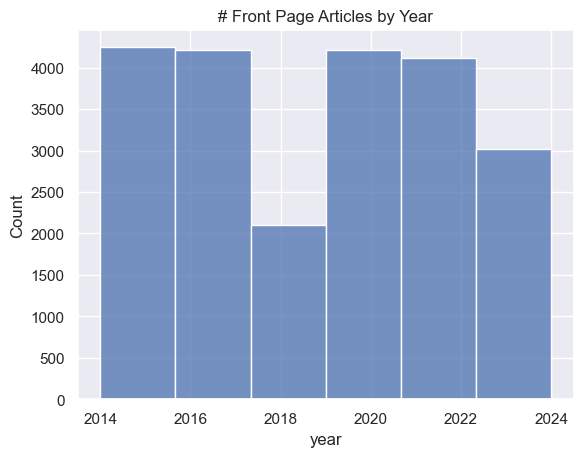

In [797]:
sns.histplot(data=front_pages, x='year', bins=6,stat='count')
plt.title('# Front Page Articles by Year')
plt.show()

## kaggle comparison

In [798]:
# Download dataset via kaggle api
!kaggle datasets download -d aryansingh0909/nyt-articles-21m-2000-present


Dataset URL: https://www.kaggle.com/datasets/aryansingh0909/nyt-articles-21m-2000-present
License(s): CC0-1.0
... resuming from 915645013 bytes (0 bytes left) ...
416 - Requested range not satisfiable


In [799]:
import zipfile
with zipfile.ZipFile('nyt-articles-21m-2000-present.zip', 'r') as zip_ref:
    zip_ref.extractall('nyt-articles-21m-2000-present')
kag = pd.read_csv('nyt-articles-21m-2000-present/nyt-metadata.csv')


/var/folders/8b/v7w_w2sd2_sfpzkzkklkmt880000gn/T/ipykernel_60117/3304256370.py:4: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  kag = pd.read_csv('nyt-articles-21m-2000-present/nyt-metadata.csv')


In [800]:
if kag['print_page'].dtype != 'int64':
    kag['print_page'] = pd.to_numeric(kag['print_page'], errors='coerce')

kag_front_pages = kag[(kag['print_section'] == 'A') & (kag['print_page'] == 1)]
kag_front_pages['pub_date']=pd.to_datetime(kag_front_pages['pub_date'])
kag_front_pages['year'] = kag_front_pages['pub_date'].dt.year


/var/folders/8b/v7w_w2sd2_sfpzkzkklkmt880000gn/T/ipykernel_60117/3174629950.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kag_front_pages['pub_date']=pd.to_datetime(kag_front_pages['pub_date'])
/var/folders/8b/v7w_w2sd2_sfpzkzkklkmt880000gn/T/ipykernel_60117/3174629950.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kag_front_pages['year'] = kag_front_pages['pub_date'].dt.year


/Users/shrutigupta/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/shrutigupta/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


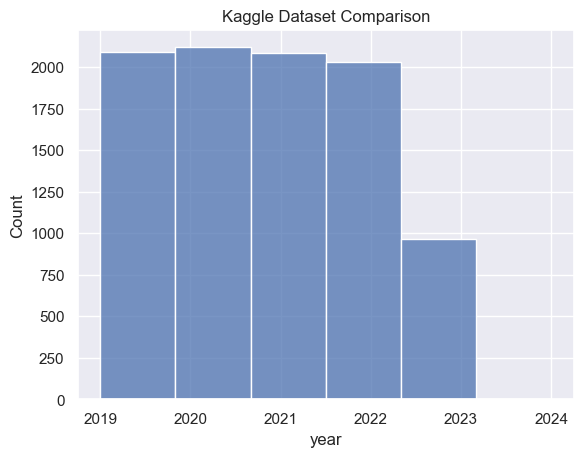

In [801]:
sns.histplot(data=kag_front_pages[kag_front_pages['year'] >= 2019], x='year',bins=6,multiple='stack',stat='count')
plt.title('Kaggle Dataset Comparison')
plt.xticks(ticks=np.arange(2019,2025),labels=years)
plt.show()

In [808]:
kag_front_pages[kag_front_pages['year']>=2014]['year'].value_counts().sort_index()

year
2014    2140
2015    2107
2016    2111
2017    2097
2018    2105
2019    2092
2020    2120
2021    2088
2022    2034
2023     963
2024       2
Name: count, dtype: int64

In [809]:
front_pages['year'].value_counts().sort_index()

year
2014    2140
2015    2107
2016    2111
2017    2097
2018    2105
2019    2092
2020    2120
2021    2088
2022    2034
2023    2029
2024     994
Name: count, dtype: int64

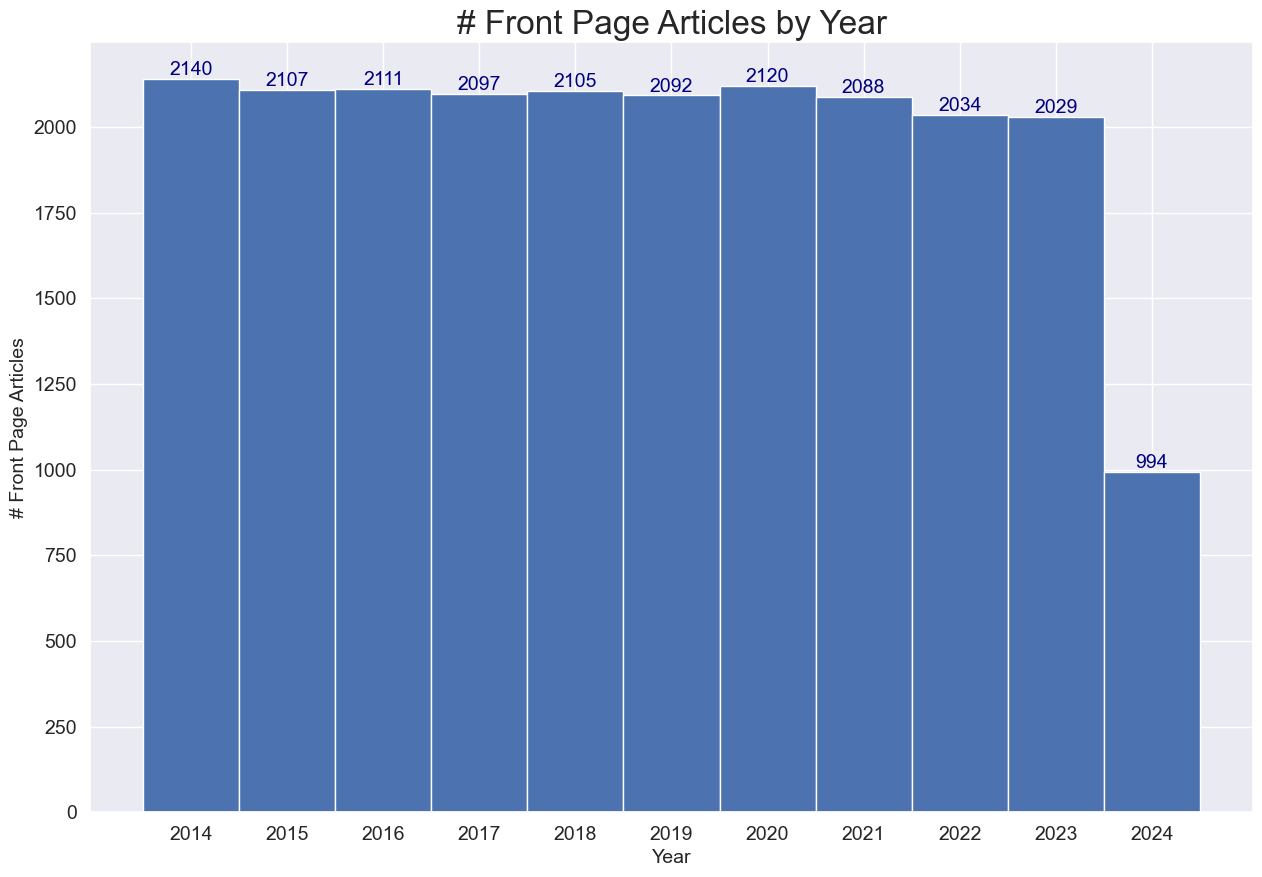

In [850]:
plt.figure(figsize=(15, 10))

setbins = np.arange(2014,2026) - 0.5

values, bins, bars = plt.hist(front_pages['year'], edgecolor='white',align='mid',bins=setbins)


plt.bar_label(bars, fontsize=14, color='navy')

plt.xticks(np.arange(2014,2025))
plt.xlabel('Year',fontsize=14)
plt.ylabel('# Front Page Articles',fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)

plt.title('# Front Page Articles by Year',fontsize=24)
plt.show()



In [859]:
front_pages.reset_index(drop=True,inplace=True)

# front page columns exploration

In [1460]:
front_pages['type_of_material'].value_counts(dropna=False)

type_of_material
News                   20995
News Analysis            472
Obituary (Obit)          269
Interactive Feature      108
Op-Ed                     37
Review                    12
Biography                  6
An Appraisal               6
Series                     3
Editorial                  2
List                       2
Quote                      2
Military Analysis          1
Summary                    1
briefing                   1
Name: count, dtype: int64

In [1461]:
front_pages['document_type'].value_counts(dropna=False)

document_type
article       21809
multimedia      108
Name: count, dtype: int64

In [1463]:
front_pages['subsection_name'].value_counts(dropna=False)

subsection_name
NaN                       8844
Politics                  6111
Europe                    1974
Middle East               1365
Asia Pacific              1127
Economy                    496
Americas                   486
Africa                     291
Media                      247
DealBook                   139
Music                      103
Pro Football                80
Art & Design                72
Energy & Environment        71
Olympics                    62
International Business      60
Baseball                    59
Pro Basketball              40
Soccer                      40
Television                  36
Canada                      28
College Football            27
Tennis                      23
Australia                   20
College Basketball          14
World Cup                   14
Environment                 14
Golf                        10
Space & Cosmos              10
Live                         7
Mind                         6
Eat                    

Lots of NAs in the subsection name. As we see below it's the only column in the front pages with NAs.

In [1464]:
front_pages.isna().sum()

abstract               0
web_url                0
snippet                0
lead_paragraph         0
print_section          0
print_page             0
source                 0
multimedia             0
headline               0
keywords               0
pub_date               0
document_type          0
news_desk              0
section_name           0
subsection_name     8844
byline                 0
type_of_material       0
_id                    0
word_count             0
uri                    0
year                   0
num_subj               0
num_persons            0
num_glocs              0
num_creatives          0
persons                0
subjects               0
dtype: int64

# front page keywords exploration

In [1005]:
keys = set()

for dct_list in front_pages['keywords']:
    for dct in dct_list:
        for i in dct.keys():
            keys.add(i)

In [1007]:
keys

{'major', 'name', 'rank', 'value'}

## names

In [1113]:
namelist = []

for dct in list(front_pages['keywords']):
    for item in dct: 
        namelist.append(item['name'])

In [1009]:
Counter(namelist) #how many people, subjects, etc, are mentioned (overall 2014-2024)

Counter({'subject': 101527,
         'persons': 39511,
         'organizations': 28428,
         'glocations': 26797,
         'creative_works': 546})

Each subject, name, organization, location, and creative work (ie film, book, etc) is tagged. 

it would be useful to have:
1. col. which has list of subjects mentioned, col w list of names mentioned, etc
1. cols w # of each attribute (like how many subjects in the article, etc)

In [1074]:
namevals=Counter(namelist)

In [1546]:
namevals

Counter({'subject': 101527,
         'persons': 39511,
         'organizations': 28428,
         'glocations': 26797,
         'creative_works': 546})

In [1133]:
mentions_dict={} #dict to store indices which keywords val has that attribute
for name in namevals:
    mentions_dict[name]= [idx for idx, dct_list in enumerate(front_pages['keywords'])
                              for dct in dct_list
                              for item in [dct] 
                              if item.get('name') == name]

In [1094]:


subj_mentions=dict({d:Counter(mentions_dict[d]) for d in mentions_dict.keys()}['subject'])
person_mentions=dict({d:Counter(mentions_dict[d]) for d in mentions_dict.keys()}['persons'])
gloc_mentions=dict({d:Counter(mentions_dict[d]) for d in mentions_dict.keys()}['glocations'])
cworks_mentions=dict({d:Counter(mentions_dict[d]) for d in mentions_dict.keys()}['creative_works'])



In [1547]:
orgs_mentions=dict({d:Counter(mentions_dict[d]) for d in mentions_dict.keys()}['organizations'])


In [1098]:
front_pages['num_subj']=front_pages.index.map(subj_mentions).fillna(0).astype(int)

/var/folders/8b/v7w_w2sd2_sfpzkzkklkmt880000gn/T/ipykernel_60117/3947999415.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  front_pages['num_subj']=front_pages.index.map(subj_mentions).fillna(0).astype(int)


In [ ]:
front_pages['num_persons']=front_pages.index.map(person_mentions).fillna(0).astype(int)
front_pages['num_glocs']=front_pages.index.map(gloc_mentions).fillna(0).astype(int)
front_pages['num_creatives']=front_pages.index.map(cworks_mentions).fillna(0).astype(int)

In [1548]:
front_pages['num_orgs']=front_pages.index.map(orgs_mentions).fillna(0).astype(int)

/var/folders/8b/v7w_w2sd2_sfpzkzkklkmt880000gn/T/ipykernel_60117/4091607086.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  front_pages['num_orgs']=front_pages.index.map(orgs_mentions).fillna(0).astype(int)


In [1549]:
front_pages['num_orgs'].describe()

count    21917.000000
mean         1.297075
std          1.362094
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max         20.000000
Name: num_orgs, dtype: float64

## values

All values (locations, persons, creative works, subjects, organizations)

In [1114]:
valuelist = []

for dct in list(front_pages['keywords']):
    for item in dct: 
        valuelist.append(item['value'])

In [1121]:
Counter(valuelist).most_common()[:10]

[('United States Politics and Government', 6061),
 ('Trump, Donald J', 4990),
 ('United States International Relations', 2256),
 ('Politics and Government', 2071),
 ('Republican Party', 2070),
 ('Coronavirus (2019-nCoV)', 1754),
 ('Democratic Party', 1746),
 ('Biden, Joseph R Jr', 1683),
 ('Russia', 1638),
 ('United States', 1373)]

All time most common tags: politics and political figures

Hopefully these are cross-tagged so if something has Joe Biden it also is tagged with the Democratic Party, but will investigate.

### persons

In [1275]:

personsd = defaultdict(list)
for k, v in list(values_dict['persons']):
    personsd[k].append(v)
front_pages['persons']=front_pages.index.map(personsd)

/var/folders/8b/v7w_w2sd2_sfpzkzkklkmt880000gn/T/ipykernel_60117/3791260970.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  front_pages['persons']=front_pages.index.map(personsd)


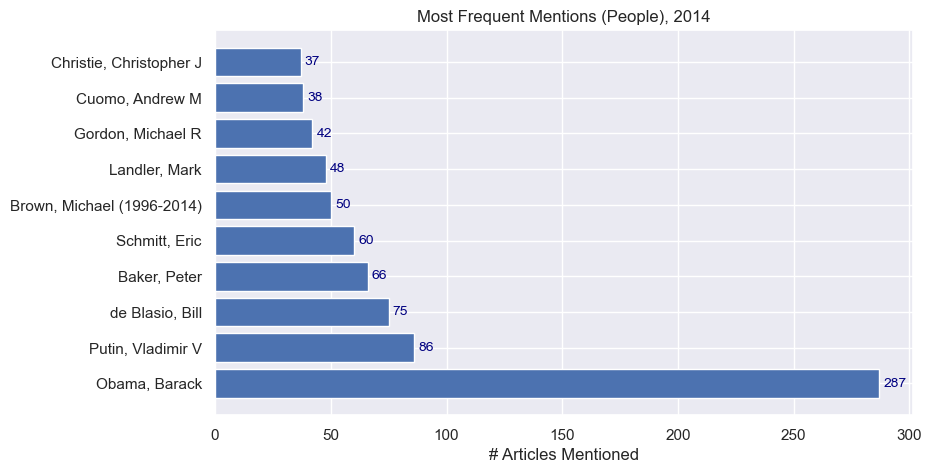

In [1355]:
plt.figure(figsize=(9,5))
person2014=dict(Counter(list(pd.DataFrame(front_pages.groupby('year')['persons'].agg(lambda x: list(x))).loc[2014].explode('persons').explode())).most_common(10))
bars=plt.barh(range(len(person2014)), list(person2014.values()), align='center')
plt.yticks(range(len(person2014)), list(person2014.keys()))
plt.bar_label(bars,color='navy',fontsize=10,padding=3)
plt.xlabel('# Articles Mentioned')
plt.title('Most Frequent Mentions (People), 2014')
plt.show()

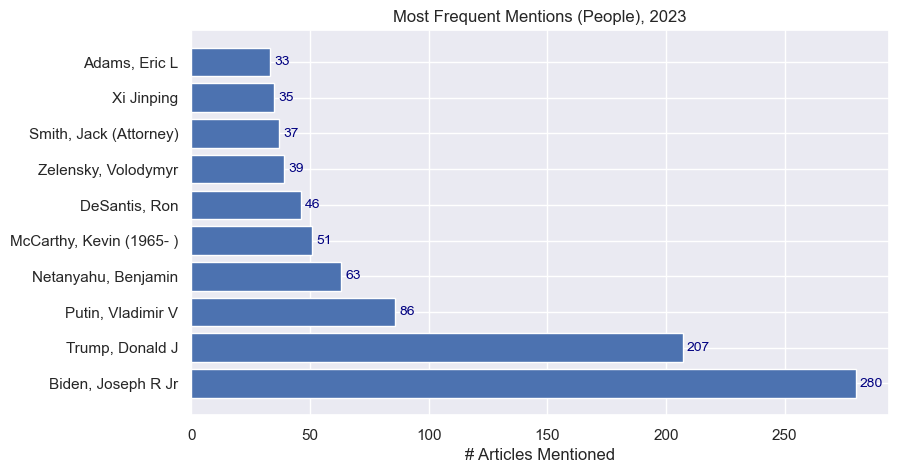

In [1358]:
plt.figure(figsize=(9,5))
person2014=dict(Counter(list(pd.DataFrame(front_pages.groupby('year')['persons'].agg(lambda x: list(x))).loc[2023].explode('persons').explode())).most_common(10))
bars=plt.barh(range(len(person2014)), list(person2014.values()), align='center')
plt.yticks(range(len(person2014)), list(person2014.keys()))
plt.bar_label(bars,color='navy',fontsize=10,padding=3)
plt.xlabel('# Articles Mentioned')
plt.title('Most Frequent Mentions (People), 2023')
plt.show()

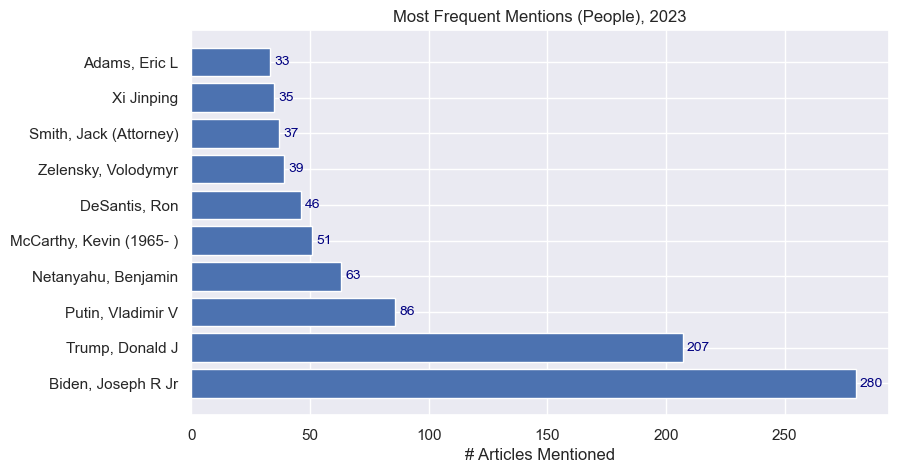

In [1364]:
plt.figure(figsize=(9,5))
person2014=dict(Counter(list(pd.DataFrame(front_pages.groupby('year')['persons'].agg(lambda x: list(x))).loc[2023].explode('persons').explode())).most_common(10))
bars=plt.barh(range(len(person2014)), list(person2014.values()), align='center')
plt.yticks(range(len(person2014)), list(person2014.keys()))
plt.bar_label(bars,color='navy',fontsize=10,padding=3)
plt.xlabel('# Articles Mentioned')
plt.title('Most Frequent Mentions (People), 2023')
plt.show()

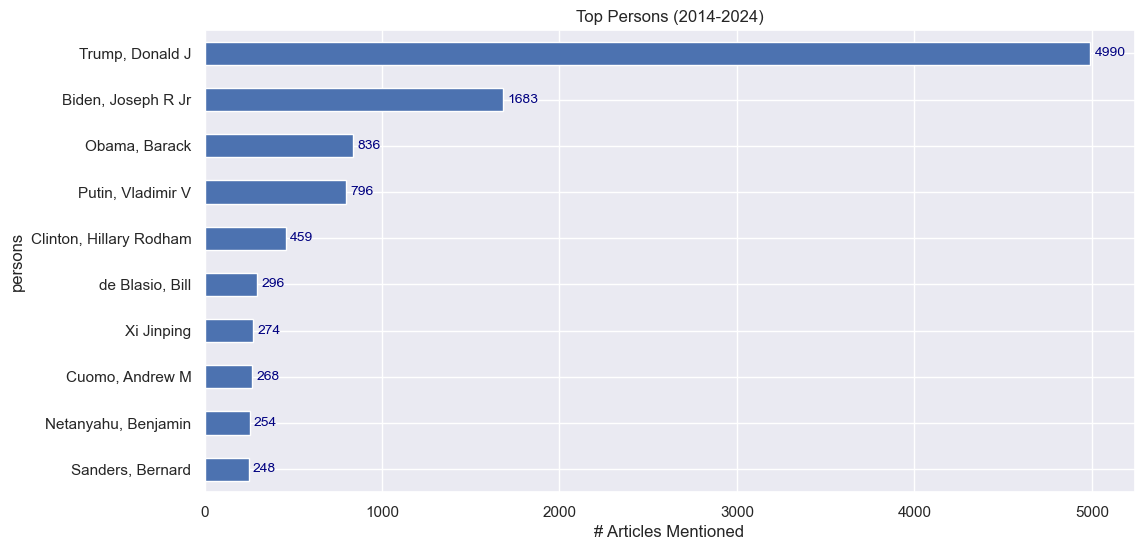

In [1408]:
plt.figure(figsize=(12,6))
bars = front_pages.explode('persons')['persons'].value_counts().head(10).iloc[::-1].plot(kind='barh')


for bar in bars.containers:
    bars.bar_label(bar, label_type='edge', color='navy', fontsize=10, padding=3)
plt.xlabel('# Articles Mentioned')
plt.title('Top Persons (2014-2024)')

plt.show()

### subjects

In [1367]:

subjectsd = defaultdict(list)
for k, v in list(values_dict['subject']):
    subjectsd[k].append(v)
front_pages['subjects']=front_pages.index.map(subjectsd)

/var/folders/8b/v7w_w2sd2_sfpzkzkklkmt880000gn/T/ipykernel_60117/559399272.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  front_pages['subjects']=front_pages.index.map(subjectsd)


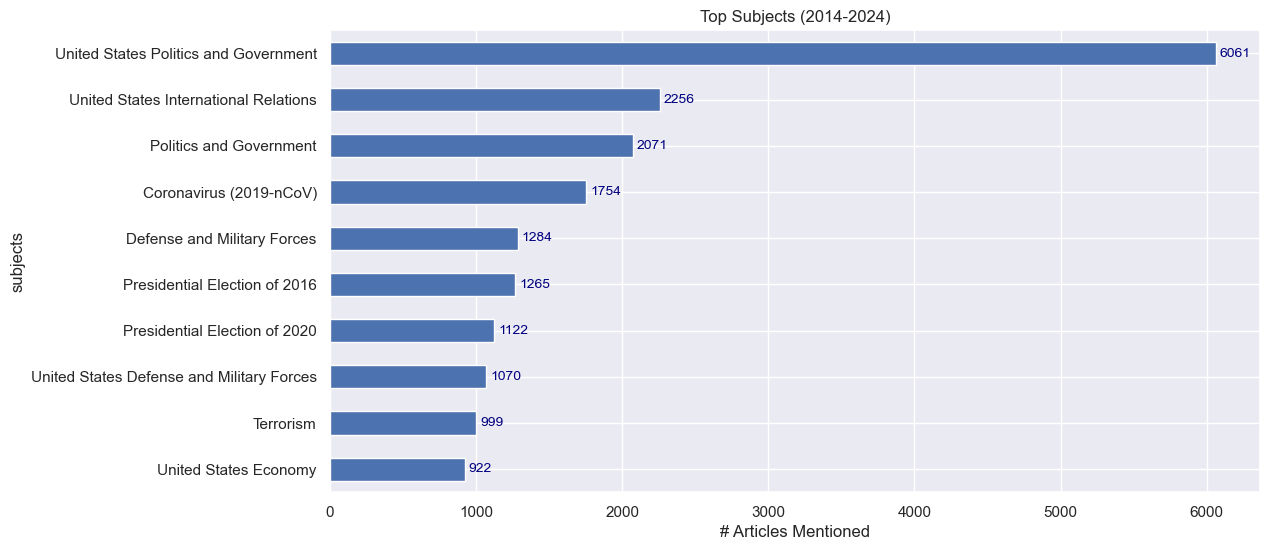

In [1407]:
plt.figure(figsize=(12,6))
bars = front_pages.explode('subjects')['subjects'].value_counts().head(10).iloc[::-1].plot(kind='barh')


for bar in bars.containers:
    bars.bar_label(bar, label_type='edge', color='navy', fontsize=10, padding=3)
plt.xlabel('# Articles Mentioned')
plt.title('Top Subjects (2014-2024)')

plt.show()

In [1482]:
front_pages['subsection_name'].value_counts(dropna=False)

subsection_name
NaN                       8844
Politics                  6111
Europe                    1974
Middle East               1365
Asia Pacific              1127
Economy                    496
Americas                   486
Africa                     291
Media                      247
DealBook                   139
Music                      103
Pro Football                80
Art & Design                72
Energy & Environment        71
Olympics                    62
International Business      60
Baseball                    59
Pro Basketball              40
Soccer                      40
Television                  36
Canada                      28
College Football            27
Tennis                      23
Australia                   20
College Basketball          14
World Cup                   14
Environment                 14
Golf                        10
Space & Cosmos              10
Live                         7
Mind                         6
Eat                    

### glocs

/var/folders/8b/v7w_w2sd2_sfpzkzkklkmt880000gn/T/ipykernel_60117/497780901.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  front_pages['glocs']=front_pages.index.map(glocsd)


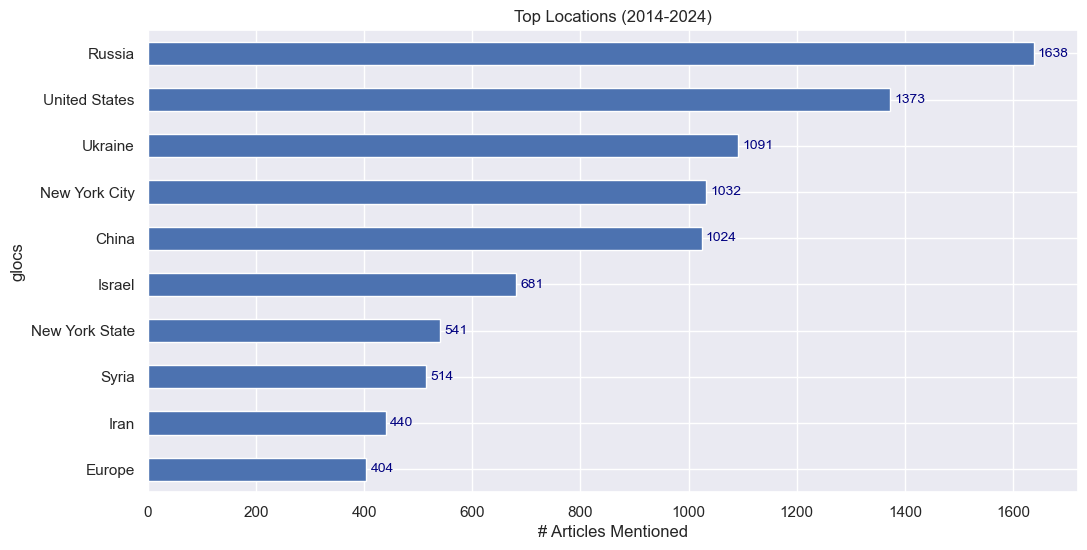

In [1497]:

glocsd = defaultdict(list)
for k, v in list(values_dict['glocations']):
    glocsd[k].append(v)
front_pages['glocs']=front_pages.index.map(glocsd)

plt.figure(figsize=(12,6))
bars = front_pages.explode('glocs')['glocs'].value_counts().head(10).iloc[::-1].plot(kind='barh')


for bar in bars.containers:
    bars.bar_label(bar, label_type='edge', color='navy', fontsize=10, padding=3)
plt.xlabel('# Articles Mentioned')
plt.title('Top Locations (2014-2024)')

plt.show()

### creatives

In [1551]:

creativesd = defaultdict(list)
for k, v in list(values_dict['creative_works']):
    creativesd[k].append(v)
front_pages['creativewks']=front_pages.index.map(creativesd)

/var/folders/8b/v7w_w2sd2_sfpzkzkklkmt880000gn/T/ipykernel_60117/4257403095.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  front_pages['creativewks']=front_pages.index.map(creativesd)


In [1552]:
front_pages.columns

Index(['abstract', 'web_url', 'snippet', 'lead_paragraph', 'print_section',
       'print_page', 'source', 'multimedia', 'headline', 'keywords',
       'pub_date', 'document_type', 'news_desk', 'section_name',
       'subsection_name', 'byline', 'type_of_material', '_id', 'word_count',
       'uri', 'year', 'num_subj', 'num_persons', 'num_glocs', 'num_creatives',
       'persons', 'subjects', 'glocs', 'num_orgs', 'creativewks'],
      dtype='object')

### orgs

In [1553]:

orgsd = defaultdict(list)
for k, v in list(values_dict['organizations']):
    orgsd[k].append(v)
front_pages['orgs']=front_pages.index.map(orgsd)

/var/folders/8b/v7w_w2sd2_sfpzkzkklkmt880000gn/T/ipykernel_60117/2532803342.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  front_pages['orgs']=front_pages.index.map(orgsd)


# non front page exploration & cleaning

In [1412]:
rest=nytfull[(nytfull['print_section']!='A') & (nytfull['print_page']!='1')]

In [1421]:
len(rest)

431753

In [1429]:
len(rest.dropna(subset=['print_section', 'print_page'], axis=0))


184384

What non-NYT articles do we want to consider?  Ex. exclude slideshows? Exclude non-print articles (ie NaN print section/print page?) 
- if we take out NAs in print section/print page, we only have 184,284 observations (compared to 431753).
- Also, it's interesting to see what articles didn't even get to the print pages at all.
- But then we should take out articles where it doesn't make sense for them to be printed, like a slideshow.

In [1431]:
rest['document_type'].value_counts()

document_type
article           369739
multimedia         57498
audio               3355
audiocontainer      1161
Name: count, dtype: int64

In [1432]:
front_pages['document_type'].value_counts()

document_type
article       21809
multimedia      108
Name: count, dtype: int64

Audio, audio container should be taken out.

In [1435]:
front_pages['type_of_material'].value_counts()

type_of_material
News                   20995
News Analysis            472
Obituary (Obit)          269
Interactive Feature      108
Op-Ed                     37
Review                    12
Biography                  6
An Appraisal               6
Series                     3
Editorial                  2
List                       2
Quote                      2
Military Analysis          1
Summary                    1
briefing                   1
Name: count, dtype: int64

In [1436]:
rest['type_of_material'].value_counts()

type_of_material
News                   286270
Review                  29060
Op-Ed                   21647
Interactive Feature     17659
Video                   16589
Slideshow               15650
briefing                12827
                        10950
Obituary (Obit)          6291
Schedule                 4069
Letter                   3298
Question                 2466
Editorial                1388
List                     1387
Brief                     460
Correction                439
News Analysis             430
Interview                 280
Text                      152
Special Report             98
recipe                     94
Newsletter                 80
Web Log                    57
An Appraisal               43
Caption                    25
Summary                     8
Biography                   8
An Analysis                 7
Quote                       5
Series                      5
Interactive Graphic         3
First Chapter               3
Addendum               

- Audio podcast
- Video
- Slideshow
- Interactive graphic
- web log

should be taken out probably.


What's the blank after briefing?

In [1439]:
rest[rest['type_of_material']=='']['document_type'].value_counts()

document_type
multimedia    7597
audio         3353
Name: count, dtype: int64

In [1440]:
rest[rest['type_of_material']=='']

,abstract,web_url,snippet,lead_paragraph,print_section,print_page,source,multimedia,headline,keywords,...,document_type,news_desk,section_name,subsection_name,byline,type_of_material,_id,word_count,uri,year
514,Ben Ratliff and Nate Chinen discuss the notabl...,https://www.nytimes.com/audio/2014/01/03/arts/...,Ben Ratliff and Nate Chinen discuss the notabl...,Ben Ratliff and Nate Chinen discuss the notabl...,NaN,NaN,The New York Times,[],"{'main': 'The Year in Jazz', 'kicker': None, '...",[],...,audio,,Arts,Music,"{'original': '', 'person': [], 'organization':...",,nyt://audio/b869c820-ff82-5e67-aaba-18f91102868a,0,nyt://audio/b869c820-ff82-5e67-aaba-18f91102868a,2014
527,"This week, Chang-rae Lee discusses his latest ...",https://www.nytimes.com/audio/2014/01/03/books...,"This week, Chang-rae Lee discusses his latest ...","This week, Chang-rae Lee discusses his latest ...",NaN,NaN,The New York Times,[],{'main': 'Inside The New York Times Book Revie...,"[{'name': 'subject', 'value': 'Books and Liter...",...,audio,,Books,Book Review,"{'original': '', 'person': [], 'organization':...",,nyt://audio/c8df3a87-fde1-5845-b6e4-248ff808197b,0,nyt://audio/c8df3a87-fde1-5845-b6e4-248ff808197b,2014
529,"This week, Chang-rae Lee and Victoria Wilson.",https://www.nytimes.com/audio/2014/01/03/books...,"This week, Chang-rae Lee and Victoria Wilson.","This week, Chang-rae Lee and Victoria Wilson.",NaN,NaN,The New York Times,[],{'main': 'Inside The New York Times Book Revie...,"[{'name': 'subject', 'value': 'Books and Liter...",...,audio,,Books,Book Review,"{'original': '', 'person': [], 'organization':...",,nyt://audio/fbf369a8-a848-5f5b-9da5-8768e8fd43c2,0,nyt://audio/fbf369a8-a848-5f5b-9da5-8768e8fd43c2,2014
983,We begin a new series that will dive deep into...,https://www.nytimes.com/audio/2014/01/07/scien...,We begin a new series that will dive deep into...,We begin a new series that will dive deep into...,NaN,NaN,The New York Times,[],"{'main': 'Knowing a Brain, Saving Sheep and Av...","[{'name': 'subject', 'value': 'Brain', 'rank':...",...,audio,,Science,NaN,"{'original': '', 'person': [], 'organization':...",,nyt://audio/20e37e16-741a-5e70-9a3e-2d384824b76d,0,nyt://audio/20e37e16-741a-5e70-9a3e-2d384824b76d,2014
2068,"This week, Greg Grandin talks about “Empire of...",https://www.nytimes.com/audio/2014/01/10/books...,"This week, Greg Grandin talks about “Empire of...","This week, Greg Grandin talks about “Empire of...",NaN,NaN,The New York Times,[],{'main': 'Inside The New York Times Book Revie...,"[{'name': 'subject', 'value': 'Books and Liter...",...,audio,,Books,Book Review,"{'original': '', 'person': [], 'organization':...",,nyt://audio/468cb5ae-1f78-5d55-960e-b46f334d3ac4,0,nyt://audio/468cb5ae-1f78-5d55-960e-b46f334d3ac4,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81411,Get live results and maps from the 2024 Utah p...,https://www.nytimes.com/interactive/2024/06/25...,Get live results and maps from the 2024 Utah p...,Get live results and maps from the 2024 Utah p...,NaN,NaN,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...",{'main': 'Utah 2nd Congressional District Prim...,"[{'name': 'subject', 'value': 'Elections', 'ra...",...,multimedia,Graphics,U.S.,Elections,"{'original': '', 'person': [], 'organization':...",,nyt://interactive/22a30e3d-9334-5039-b4b0-75bb...,0,nyt://interactive/22a30e3d-9334-5039-b4b0-75bb...,2024
81412,See results from the New York State Assembly p...,https://www.nytimes.com/interactive/2024/06/25...,See results from the New York State Assembly p...,See results from the New York State Assembly p...,NaN,NaN,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...",{'main': 'New York State Assembly Primary Elec...,"[{'name': 'subject', 'value': 'Elections', 'ra...",...,multimedia,Graphics,U.S.,Elections,"{'original': '', 'person': [], 'organization':...",,nyt://interactive/eb021052-d063-5020-901a-19c8...,0,nyt://interactive/eb0210

# rest cleaning

- keep in articles missing print section and/or print page (these ones didn’t even make it to the print newspaper lol)
- remove articles that are listed as type of material is: Audio podcast, Video, Slideshow, Interactive graphic, web log. (These are the types we don’t see in the front page set, which makes sense bcause they could never have been printed.)

In [1500]:
rest_clean = rest[~rest['type_of_material'].isin(['Audio Podcast', 'Video', 'Slideshow', 'Interactive Graphic', 'Web Log'])]



In [1505]:
rest_clean = rest_clean[~rest_clean['document_type'].isin(['audio','audiocontainer'])]

In [1508]:
len(rest) - len(rest_clean) #amount of records lost

36815

In [1531]:
rest_clean=rest_clean[~rest_clean['web_url'].str.contains('video')]

In [1533]:
len(rest_clean)

392846

In [1534]:
rest_clean['document_type'].value_counts()

document_type
article       367679
multimedia     25167
Name: count, dtype: int64

In [1535]:
rest_clean['type_of_material'].value_counts()

type_of_material
News                   283241
Review                  29005
Op-Ed                   21617
Interactive Feature     17578
briefing                12822
                         7589
Obituary (Obit)          6286
Schedule                 4066
Letter                   3297
Question                 2440
List                     1387
Editorial                1387
Brief                     460
Correction                439
News Analysis             427
Interview                 280
Text                      147
Special Report             98
recipe                     94
Newsletter                 80
An Appraisal               43
Caption                    25
Biography                   8
Summary                     8
An Analysis                 7
Quote                       5
Series                      4
First Chapter               3
Addendum                    2
Editors' Note               1
Name: count, dtype: int64

In [1542]:
rest_clean.to_csv('rest.zip', index=False, compression='zip')

In [1543]:
front_pages.to_csv('front_pages.zip', index=False,compression='zip')

## rest add columns

In [1556]:
namelistrest = []

for dct in list(rest_clean['keywords']):
    for item in dct: 
        namelistrest.append(item['name'])

In [1558]:
Counter(namelistrest) #confirming its the same as front_pages

Counter({'subject': 979255,
         'persons': 407711,
         'organizations': 295436,
         'glocations': 195023,
         'creative_works': 79822})

In [1559]:
rest_mentions_dict={} #dict to store indices which keywords val has that attribute
for name in namevals:
    rest_mentions_dict[name]= [idx for idx, dct_list in enumerate(rest_clean['keywords'])
                              for dct in dct_list
                              for item in [dct] 
                              if item.get('name') == name]

rest_subj_mentions=dict({d:Counter(rest_mentions_dict[d]) for d in rest_mentions_dict.keys()}['subject'])
rest_person_mentions=dict({d:Counter(rest_mentions_dict[d]) for d in rest_mentions_dict.keys()}['persons'])
rest_gloc_mentions=dict({d:Counter(rest_mentions_dict[d]) for d in rest_mentions_dict.keys()}['glocations'])
rest_cworks_mentions=dict({d:Counter(rest_mentions_dict[d]) for d in rest_mentions_dict.keys()}['creative_works'])
rest_org_mentions=dict({d:Counter(rest_mentions_dict[d]) for d in rest_mentions_dict.keys()}['organizations'])



In [1561]:
rest_clean['num_subjects']=rest_clean.index.map(rest_subj_mentions).fillna(0).astype(int)
rest_clean['num_persons']=rest_clean.index.map(rest_person_mentions).fillna(0).astype(int)
rest_clean['num_glocs']=rest_clean.index.map(rest_gloc_mentions).fillna(0).astype(int)
rest_clean['num_creatives']=rest_clean.index.map(rest_cworks_mentions).fillna(0).astype(int)
rest_clean['num_orgs']=rest_clean.index.map(rest_org_mentions).fillna(0).astype(int)

In [ ]:
restvaluelist = []

for dct in list(rest_clean['keywords']):
    for item in dct: 
        restvaluelist.append(item['value'])

restpersonsd = defaultdict(list)

for k, v in list(values_dict['persons']):
    personsd[k].append(v)
front_pages['persons']=front_pages.index.map(personsd)

In [1570]:
rest_values_dict={}
for name in namevals:
    rest_values_dict[name]=[(idx,dct['value']) for idx, dct_list in enumerate(rest_clean['keywords'])
                              for dct in dct_list
                              for item in [dct]
                                if dct['name']==name]

In [1574]:
rest_values_dict.keys()

dict_keys(['persons', 'glocations', 'subject', 'organizations', 'creative_works'])

In [1573]:

restglocsd = defaultdict(list)
for k, v in list(rest_values_dict['glocations']):
    restglocsd[k].append(v)
rest_clean['glocs']=rest_clean.index.map(restglocsd)

In [1575]:

restpersonsd = defaultdict(list)
for k, v in list(rest_values_dict['persons']):
    restpersonsd[k].append(v)
rest_clean['persons']=rest_clean.index.map(restpersonsd)

In [1578]:

restsubjectsd = defaultdict(list)
for k, v in list(rest_values_dict['subject']):
    restsubjectsd[k].append(v)
rest_clean['subjects']=rest_clean.index.map(restsubjectsd)

In [1580]:

restorgsd = defaultdict(list)
for k, v in list(rest_values_dict['organizations']):
    restorgsd[k].append(v)
rest_clean['orgs']=rest_clean.index.map(restorgsd)

In [1581]:

restcworksd = defaultdict(list)
for k, v in list(rest_values_dict['creative_works']):
    restcworksd[k].append(v)
rest_clean['cworks']=rest_clean.index.map(restcworksd)

# export

In [1597]:
front_pages.to_csv('front_pages.zip',compression='zip',index=False)

In [1598]:
rest_clean.to_csv('rest.zip',compression='zip',index=False)